# Support Vector Machine

### Linear SVM Classification

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import numpy as np
from sklearn import datasets

iris = datasets.load_iris()
X = iris["data"][:, (0, 1, 2, 3)]  # features
y = (iris["target"] == 2).astype(np.float64)  # labels(2 and others)
fn = iris["feature_names"]

In [3]:
def plot_two_features(a, b):
    plt.plot(X[:, a][y == 0], X[:, b][y == 0], "bs", label="0")
    plt.plot(X[:, a][y == 1], X[:, b][y == 1], "r^", label="1")
    plt.grid(True, which='both')
    plt.xlabel(fn[a])
    plt.ylabel(fn[b])
    plt.tight_layout()

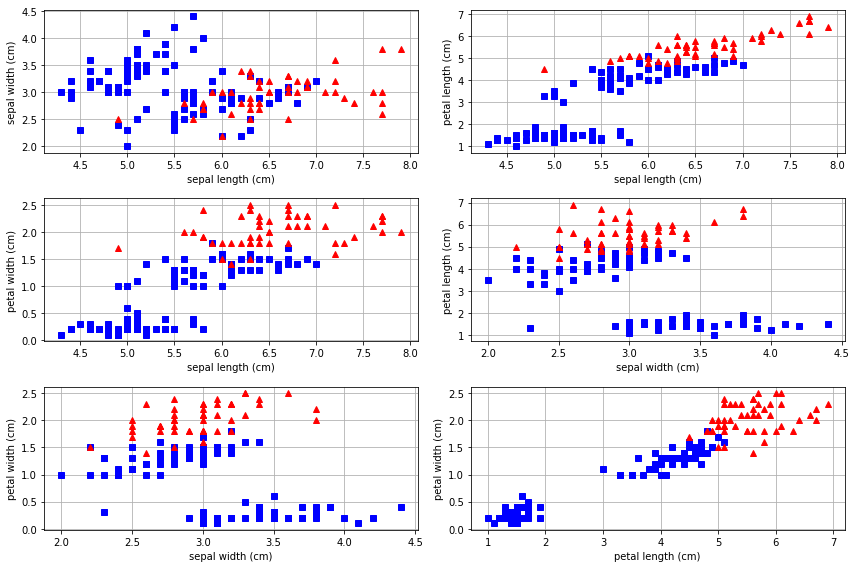

In [4]:
comb = np.array([[0, 1], [0, 2], [0, 3], [1, 2], [1, 3], [2, 3]])
plt.figure(figsize=(12, 8))
for i in range(comb.shape[0]):
    plt.subplot(3, 2, i+1)
    plot_two_features(comb[i, 0], comb[i, 1])
plt.show()

In [5]:
from sklearn.ensemble import RandomForestClassifier

rnd_clf = RandomForestClassifier(n_estimators=500, n_jobs=-1, random_state=42)
rnd_clf.fit(X, y)
for name, score in zip(fn, rnd_clf.feature_importances_):
    print(name, score)

sepal length (cm) 0.11062478396341978
sepal width (cm) 0.0248375838290915
petal length (cm) 0.4620579058270305
petal width (cm) 0.40247972638045826


### Using petal length and petal width for SVM classification

In [6]:
def plot_svc_decision_boundary(svm_clf, xmin, xmax):
    w = svm_clf.coef_[0]
    b = svm_clf.intercept_[0]
    x0 = np.linspace(xmin, xmax, 200)
    x1 = -w[0]/w[1] * x0 - b/w[1]
    margin = 1/w[1]
    gutter_up = x1 + margin
    gutter_down = x1 - margin
    # svs = svm_clf.support_vectors_
    # plt.scatter(svs[:, 0], svs[:, 1], s=180, facecolors='#FFAAAA')
    plt.plot(x0, x1, "k-", linewidth=2)
    plt.plot(x0, gutter_up, "k--", linewidth=2)
    plt.plot(x0, gutter_down, "k--", linewidth=2)

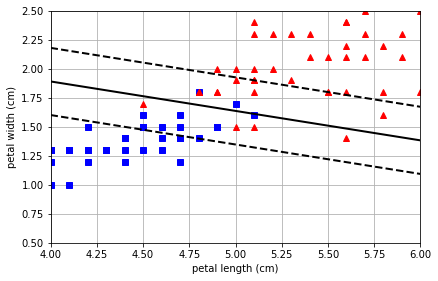

In [7]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

svm_clf = LinearSVC(C=10, loss="hinge", random_state=42)
X_5 = X[:, (comb[5])]
svm_clf.fit(X_5, y)
plot_two_features(comb[5, 0], comb[5, 1])
plt.axis([4, 6, 0.5, 2.5])
plot_svc_decision_boundary(svm_clf, 4, 8)

In [8]:
from sklearn.model_selection import cross_val_score

cross_acc = cross_val_score(svm_clf, X_5, y, cv=3, scoring="accuracy")
cross_acc

array([0.98039216, 0.96      , 0.91836735])

In [9]:
svm_clf.predict([[5.5, 1.7]])

array([1.])

### Nonlinear SVM Classification

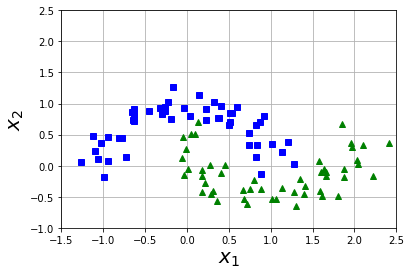

In [10]:
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=100, noise=0.15, random_state=42)


def plot_dataset(X, y, axes):
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
    plt.axis(axes)
    plt.grid(True, which='both')
    plt.xlabel(r"$x_1$", fontsize=20)
    plt.ylabel(r"$x_2$", fontsize=20)


plot_dataset(X, y, [-1.5, 2.5, -1, 2.5])
plt.show()

In [11]:
def plot_predictions(clf, axes):
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    y_decision = clf.decision_function(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap="brg", alpha=0.2)
    plt.contourf(x0, x1, y_decision, cmap="brg", alpha=0.1)

In [12]:
from sklearn.preprocessing import PolynomialFeatures

polynomial_svm_clf = Pipeline([
        ("poly_features", PolynomialFeatures(degree=3)),
        ("scaler", StandardScaler()),
        ("svm_clf", LinearSVC(C=10, loss="hinge"))
    ])
polynomial_svm_clf.fit(X, y)
polynomial_svm_clf.predict([[0.5, 0.5]])

array([0], dtype=int64)

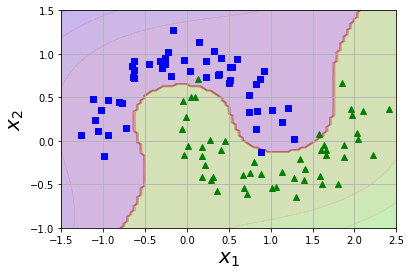

In [13]:
plot_predictions(polynomial_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.show()

In [14]:
from sklearn.svm import SVC

poly_kernel_svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="poly", degree=3, coef0=1, C=5))
    ])
poly_kernel_svm_clf.fit(X, y)
poly_kernel_svm_clf.predict([[0.5, 0.5]])

array([0], dtype=int64)

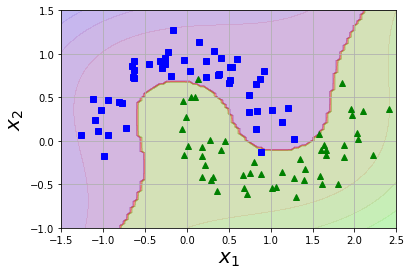

In [15]:
plot_predictions(poly_kernel_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.show()

In [16]:
rbf_kernel_svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="rbf", gamma=5, C=0.001))
    ])
rbf_kernel_svm_clf.fit(X, y)
rbf_kernel_svm_clf.predict([[0.5, 0.5]])

array([0], dtype=int64)

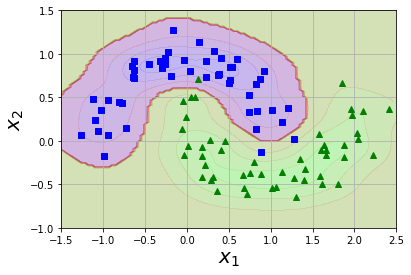

In [17]:
plot_predictions(rbf_kernel_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.show()

### SVM Regression

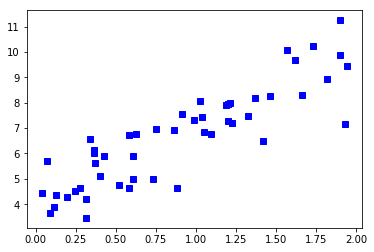

In [18]:
np.random.seed(42)
m = 50
X = 2 * np.random.rand(m, 1)
y = (4 + 3 * X + np.random.randn(m, 1)).ravel()
plt.plot(X, y, "bs")
plt.show()

In [19]:
from sklearn.svm import LinearSVR

svm_reg = LinearSVR(epsilon=1.5, random_state=42)
svm_reg.fit(X, y)
svm_reg.predict([[0.5]])

array([5.03001559])